Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
uploaded = files.upload()

Saving student_clustering.csv to student_clustering.csv


Загрузка данных

In [ ]:
dataset = pd.read_csv('student_clustering.csv')
print(dataset.head())

   cgpa   iq
0  5.13   88
1  5.90  113
2  8.36   93
3  8.27   97
4  5.45  110


Определяем переменные

In [ ]:
X = dataset[['cgpa']].values  # Признаки
y = dataset['iq'].values      # Целевая переменная

1. Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

2. Полиномиальная регрессия для различных степеней полинома

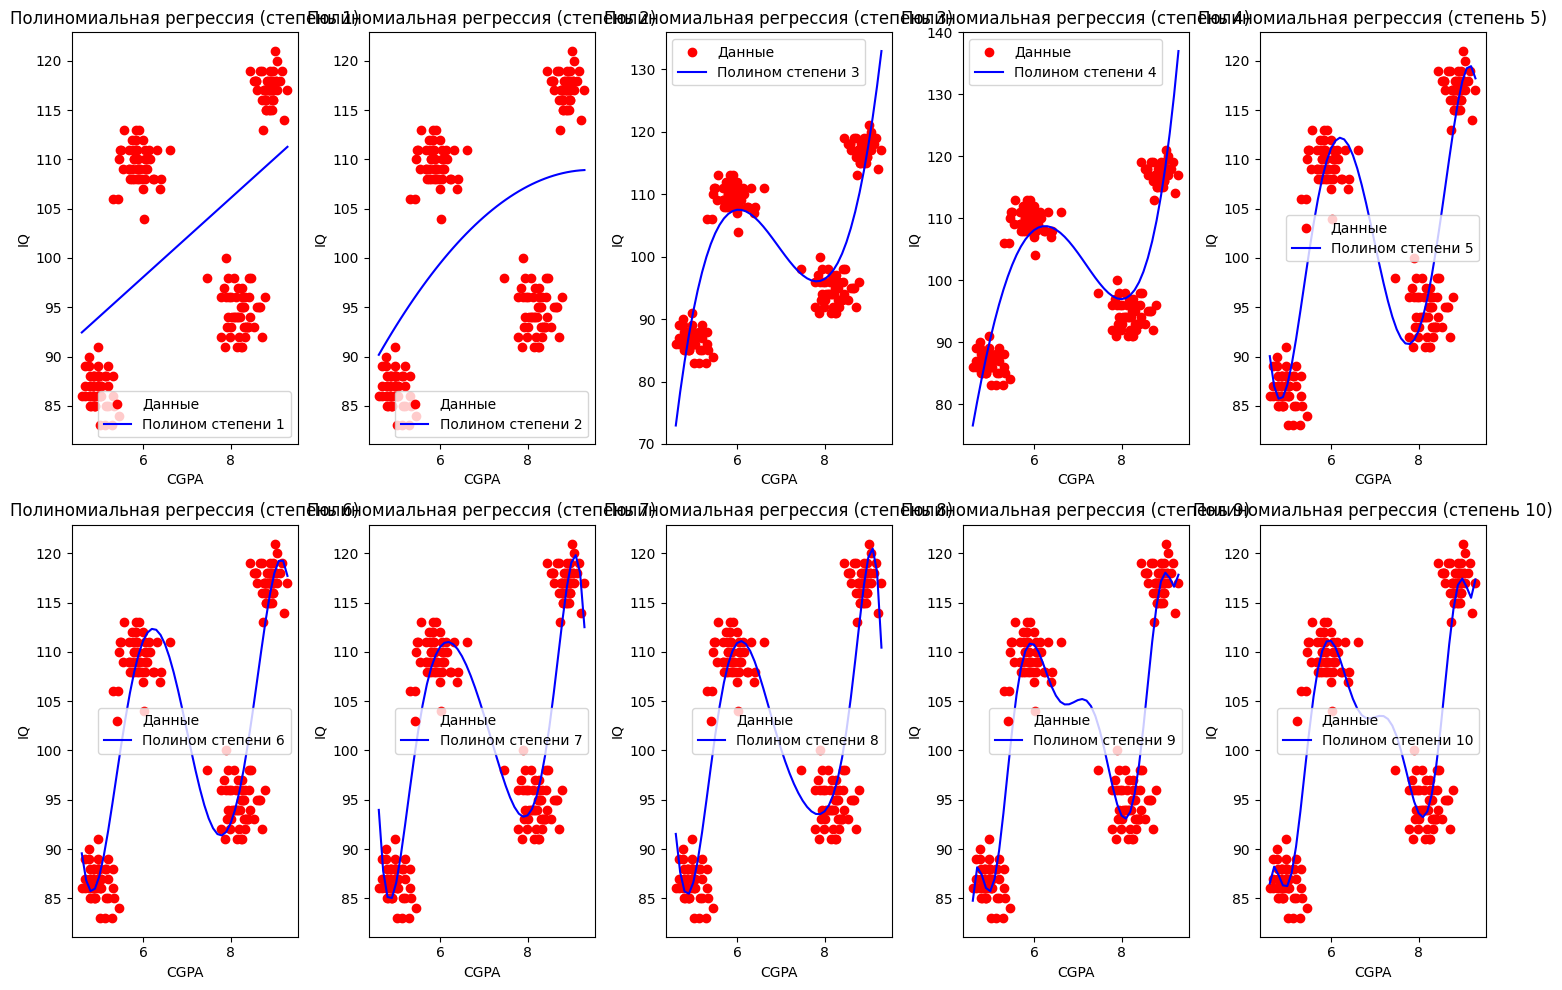

In [ ]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Перечислил степени полинома
plt.figure(figsize=(15, 10))  # Настройка размера графика

# Цикл по степеням полинома
for i, degree in enumerate(degrees, 1):
    # Создание полиномиальных признаков
    # Этот объект преобразует исходные данные X в полиномиальные признаки
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X) # Метод fit_transform(X) обучает преобразователь и применяет его к данным X, создавая полиномиальные признаки X_poly

    # Обучение полиномиальной регрессии
    lin_reg_poly = LinearRegression() # Создаем объект линейной регрессии
    lin_reg_poly.fit(X_poly, y) # Обучение его на полиномиальных признаках и целевом признаке y

    # Генерация кривой для текущей модели
    # Делаем это с помощью np.arange(), который создает значения от минимального до максимального значения в X с шагом 0.1.
    X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1).reshape(-1, 1) # Преобразуем массив в форму с одним столбцом
    y_pred = lin_reg_poly.predict(poly_reg.transform(X_grid)) # Вычисляем предсказания для каждого X_grid с использованием обученной модели lin_reg_poly

    # Построение графика
    plt.subplot(2, 5, i)  # Создаем сетку 2x5 для графиков
    plt.scatter(X, y, color='red', label='Данные')
    plt.plot(X_grid, y_pred, color='blue', label=f'Полином степени {degree}')
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.xlabel('CGPA')
    plt.ylabel('IQ')
    plt.legend()

plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()

In [ ]:
# Вывод метрик для анализа
from sklearn.metrics import mean_squared_error, r2_score

print("Анализ метрик для различных степеней полинома:")
# Перебор списка степеней полинома
for degree in degrees:
  # Для каждой степени полинома создается объект PolynomialFeatures с текущей степенью полинома.
    poly_reg = PolynomialFeatures(degree=degree)
    # fit_transform(X) преобразует входные данные X в полиномиальные признаки.
    X_poly = poly_reg.fit_transform(X)
    lin_reg_poly = LinearRegression() # Создается объект модели линейной регрессии.
    lin_reg_poly.fit(X_poly, y) # Модель обучается на полиномиальных признаках X_poly и реальных значениях y.
    y_pred = lin_reg_poly.predict(X_poly) # С помощью обученной модели делаются предсказания на полиномиальных признаках X_poly.
    mse = mean_squared_error(y, y_pred) # Веквадратичную ошибку, которая показывает, насколько предсказания модели отклоняются от реальных значений.
    r2 = r2_score(y, y_pred) # вычисляет коэффициент детерминации R^2, который показывает, какую долю вариативности данных объясняет модель.
    print(f"Степень полинома: {degree}")
    print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
    print(f"Коэффициент детерминации (R^2): {r2:.2f}\n")

Анализ метрик для различных степеней полинома:
Степень полинома: 1
Среднеквадратичная ошибка (MSE): 105.00
Коэффициент детерминации (R^2): 0.29

Степень полинома: 2
Среднеквадратичная ошибка (MSE): 103.75
Коэффициент детерминации (R^2): 0.29

Степень полинома: 3
Среднеквадратичная ошибка (MSE): 41.66
Коэффициент детерминации (R^2): 0.72

Степень полинома: 4
Среднеквадратичная ошибка (MSE): 40.63
Коэффициент детерминации (R^2): 0.72

Степень полинома: 5
Среднеквадратичная ошибка (MSE): 27.41
Коэффициент детерминации (R^2): 0.81

Степень полинома: 6
Среднеквадратичная ошибка (MSE): 27.40
Коэффициент детерминации (R^2): 0.81

Степень полинома: 7
Среднеквадратичная ошибка (MSE): 26.26
Коэффициент детерминации (R^2): 0.82

Степень полинома: 8
Среднеквадратичная ошибка (MSE): 26.00
Коэффициент детерминации (R^2): 0.82

Степень полинома: 9
Среднеквадратичная ошибка (MSE): 23.48
Коэффициент детерминации (R^2): 0.84

Степень полинома: 10
Среднеквадратичная ошибка (MSE): 23.72
Коэффициент детерм